Capstone Project

In [9]:
# importing the modules used in this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import randint, uniform

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

import joblib

In [11]:
#loading the dataset
column_names = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status", 
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", 
    "hours-per-week", "native-country", "income"
]
data = pd.read_csv('data.csv', names = column_names)
df = pd.DataFrame(data = data)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,1,77516,3,13,3,4,Not-in-family,2,1,2174,0,40,2,<=50K
1,50,2,83311,3,13,1,6,Husband,2,1,0,0,13,2,<=50K
2,38,3,215646,1,9,2,6,Not-in-family,2,1,0,0,40,2,<=50K
3,53,3,234721,1,7,1,6,Husband,3,1,0,0,40,2,<=50K
4,28,3,338409,3,13,1,4,Wife,3,2,0,0,40,2,<=50K


In [13]:
df = df.drop("relationship", axis='columns')

df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,1,77516,3,13,3,4,2,1,2174,0,40,2,<=50K
1,50,2,83311,3,13,1,6,2,1,0,0,13,2,<=50K
2,38,3,215646,1,9,2,6,2,1,0,0,40,2,<=50K
3,53,3,234721,1,7,1,6,3,1,0,0,40,2,<=50K
4,28,3,338409,3,13,1,4,3,2,0,0,40,2,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,3,215419,3,13,2,4,2,2,0,0,36,2,<=50K.
48838,64,0,321403,1,9,2,0,3,1,0,0,40,2,<=50K.
48839,38,3,374983,3,13,1,4,2,1,0,0,50,2,<=50K.
48840,44,3,83891,3,13,2,4,1,1,5455,0,40,2,<=50K.


In [15]:
print(df.head())


   age  workclass  fnlwgt  education  education-num  marital-status  \
0   39          1   77516          3             13               3   
1   50          2   83311          3             13               1   
2   38          3  215646          1              9               2   
3   53          3  234721          1              7               1   
4   28          3  338409          3             13               1   

   occupation  race  sex  capital-gain  capital-loss  hours-per-week  \
0           4     2    1          2174             0              40   
1           6     2    1             0             0              13   
2           6     2    1             0             0              40   
3           6     3    1             0             0              40   
4           4     3    2             0             0              40   

   native-country  income  
0               2   <=50K  
1               2   <=50K  
2               2   <=50K  
3               2   <=50K  


In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  int64 
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  int64 
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  int64 
 6   occupation      48842 non-null  int64 
 7   race            48842 non-null  int64 
 8   sex             48842 non-null  int64 
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  48842 non-null  int64 
 13  income          48842 non-null  object
dtypes: int64(13), object(1)
memory usage: 5.2+ MB


In [19]:
df.describe()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country
count,48842.000000,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,2.445948,1.896641e+05,1.932660,10.078089,1.858175,3.499058,2.046886,1.331518,1079.067626,87.502314,40.422382,2.005508
std,13.710510,0.928008,1.056040e+05,0.914805,2.570973,0.884133,1.643415,0.377838,0.470764,7452.019058,403.004552,12.391444,0.364626
min,17.000000,0.000000,1.228500e+04,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,2.000000,1.175505e+05,1.000000,9.000000,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,40.000000,2.000000
50%,37.000000,3.000000,1.781445e+05,2.000000,10.000000,2.000000,4.000000,2.000000,1.000000,0.000000,0.000000,40.000000,2.000000
75%,48.000000,3.000000,2.376420e+05,3.000000,12.000000,3.000000,4.000000,2.000000,2.000000,0.000000,0.000000,45.000000,2.000000
max,90.000000,4.000000,1.490400e+06,3.000000,16.000000,3.000000,6.000000,3.000000,2.000000,99999.000000,4356.000000,99.000000,3.000000


In [21]:
df.isnull().sum()


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [23]:
df['income'].value_counts()


income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

EDA

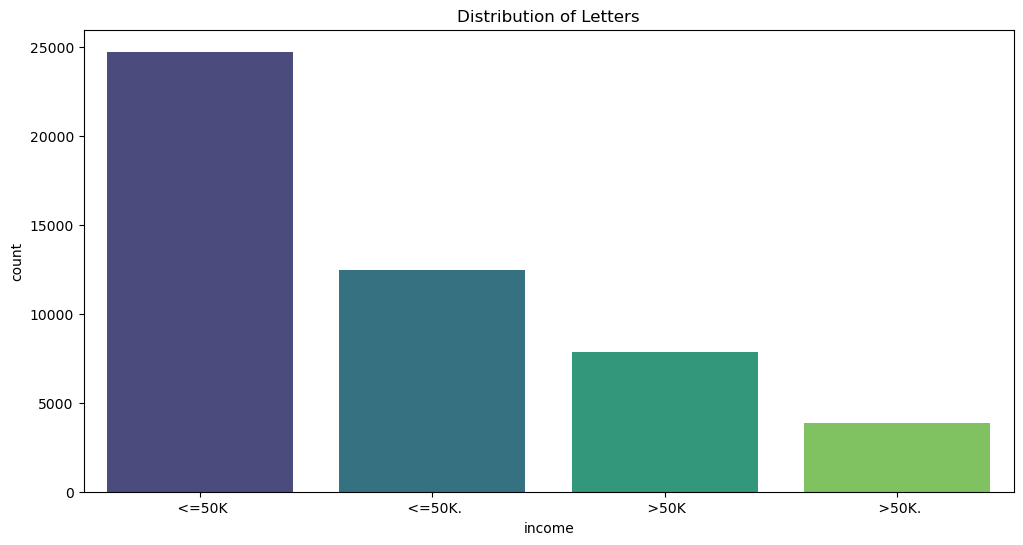

In [26]:
plt.figure(figsize = (12,6))
sns.countplot(x='income', data=df, order=sorted(df['income'].unique()), palette='viridis')
plt.title('Distribution of Letters')
plt.show()

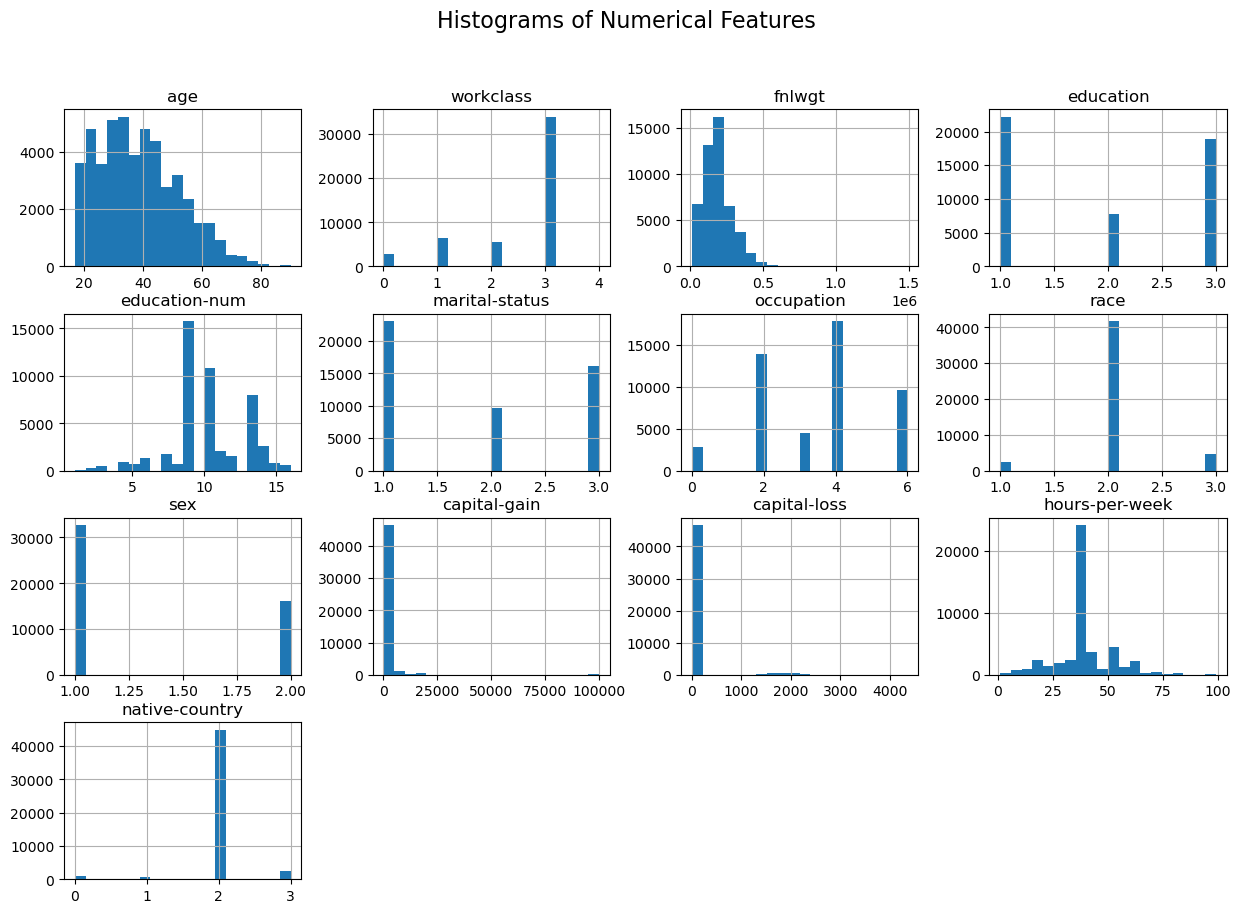

In [27]:
df.hist(bins = 20, figsize = (15,10))
plt.suptitle('Histograms of Numerical Features', fontsize = 16)
plt.show()

In [29]:
corr = df.drop('income',axis=1).corr()
corr

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country
age,1.000000,-0.134402,-0.076628,-0.060234,0.030940,-0.465970,0.046938,0.002835,-0.088120,0.077229,0.056944,0.071558,-0.018369
workclass,-0.134402,1.000000,0.028499,-0.059408,-0.077610,0.031469,0.294586,-0.017180,-0.029375,-0.003684,-0.009975,0.076277,0.027292
fnlwgt,-0.076628,0.028499,1.000000,-0.011820,-0.038761,0.033517,-0.006608,0.136928,-0.027739,-0.003706,-0.004366,-0.013519,0.060595
education,-0.060234,-0.059408,-0.011820,1.000000,0.593864,0.031961,0.087207,-0.053892,0.031348,0.039157,0.037871,0.036798,-0.066776
education-num,0.030940,-0.077610,-0.038761,0.593864,1.000000,-0.056928,0.173426,-0.069993,-0.009328,0.125146,0.080972,0.143689,-0.144630
marital-status,-0.465970,0.031469,0.033517,0.031961,-0.056928,1.000000,-0.108729,0.079112,0.329854,-0.080076,-0.072615,-0.226091,0.003630
occupation,0.046938,0.294586,-0.006608,0.087207,0.173426,-0.108729,1.000000,-0.041178,-0.116358,0.050483,0.033630,0.192734,0.011540
race,0.002835,-0.017180,0.136928,-0.053892,-0.069993,0.079112,-0.041178,1.000000,0.079635,-0.019655,-0.013497,-0.031334,0.065448
sex,-0.088120,-0.029375,-0.027739,0.031348,-0.009328,0.329854,-0.116358,0.079635,1.000000,-0.047094,-0.045480,-0.228560,0.004392
capital-gain,0.077229,-0.003684,-0.003706,0.039157,0.125146,-0.080076,0.050483,-0.019655,-0.047094,1.000000,-0.031441,0.082157,-0.021595


In [30]:
#plt.figure(figsize=(15,10))
#sns.heatmap(corr, annot=True, cmap='coolwarm')
#plt.title('Correlation Matrix')
#plt.show()

In [31]:
le = LabelEncoder()
df['Letter_encoded'] = le.fit_transform(df['income'])

In [32]:
# Splitting the data into features (X) and target variable (y)
X = df.drop('income', axis=1)
y = df['income']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes of the split data
print(f"Training data size: {X_train.shape}, Test data size: {X_test.shape}")

Training data size: (39073, 14), Test data size: (9769, 14)


In [34]:
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN Neighbours': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
}

In [40]:
results = {}
print("Model Building starts:\n")
for name, model in models.items():
    print("Training {}".format(name))
    print("="*30)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # calculating the metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average = 'macro')
    report  = classification_report(y_test, y_pred)

    #print metrics
    print("\nAccuracy score: ",accuracy)
    print("\nPrecision score: ", precision)
    print("\nRecall score: ", recall)
    print("\nF1 score: ", f1)
    print("\nClassification Report: ", report)

    #store in results dictionary
    results[name] = {
        'Accuracy' : accuracy,
        'Precision score' : precision,
        'Recall score' : recall,
        'F1 score': f1,
        'Classification Report': report
    }

Model Building starts:

Training Logistic Regression

Accuracy score:  0.5291227351827209

Precision score:  0.250646632545807

Recall score:  0.3052340119989126

F1 score:  0.25453075204772585

Classification Report:                precision    recall  f1-score   support

       <=50K       0.53      0.97      0.69      4936
      <=50K.       0.00      0.00      0.00      2478
        >50K       0.47      0.25      0.33      1562
       >50K.       0.00      0.00      0.00       793

    accuracy                           0.53      9769
   macro avg       0.25      0.31      0.25      9769
weighted avg       0.35      0.53      0.40      9769

Training KNN Neighbours

Accuracy score:  0.4733340157641519

Precision score:  0.34971022376495337

Recall score:  0.3103223888451652

F1 score:  0.3080871250014632

Classification Report:                precision    recall  f1-score   support

       <=50K       0.54      0.76      0.63      4936
      <=50K.       0.27      0.17      0.21   

In [42]:
best_model = max(results, key=lambda x: results[x]['Accuracy'])
best_model

'Random Forest'

In [78]:
from random import randint
from sklearn.model_selection import ParameterGrid

#Hyper parameter Tuning in Random Forest model
param_dist = {
    'n_estimators': randint(40, 400),
    'max_depth': randint(5, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None]
}


In [80]:
rf = RandomForestClassifier()


In [82]:
# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings sampled
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    random_state=42,
    verbose=2
)

In [ ]:
random_search.fit(X_train, y_train)
best_rf = random_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
accuracy_b = accuracy_score(y_test, y_pred_best)
precision_b = precision_score(y_test, y_pred_best, average='macro')
recall_b = recall_score(y_test, y_pred_best, average='macro')
f1_b = f1_score(y_test, y_pred_best, average = 'macro')
report_b  = classification_report(y_test, y_pred_best)



In [96]:
print('Best Model to give max accuracy is : {}, with accuracy score of {}'.format(best_model,results[best_model]['Accuracy']))
print('Evaulation scores after Hypertuning are as follows:\n')
print("\nAccuracy score: ",accuracy)
print("\nPrecision score: ", precision)
print("\nRecall score: ", recall)
print("\nF1 score: ", f1)
print("\nClassification Report: ", report)


Best Model to give max accuracy is : Random Forest, with accuracy score of 1.0
Evaulation scores after Hypertuning are as follows:


Accuracy score:  1.0

Precision score:  1.0

Recall score:  1.0

F1 score:  1.0

Classification Report:                precision    recall  f1-score   support

       <=50K       1.00      1.00      1.00      4936
      <=50K.       1.00      1.00      1.00      2478
        >50K       1.00      1.00      1.00      1562
       >50K.       1.00      1.00      1.00       793

    accuracy                           1.00      9769
   macro avg       1.00      1.00      1.00      9769
weighted avg       1.00      1.00      1.00      9769

